# Life Expentancy and GDP: A Case Study

## Introduction:
The following notebook is a project to analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

### Initial Questions:
- Is life expectancy of a country explained by its GDP?
- Does the relationship between life expectancy and GDP change on a country to country basis?

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Assuming 'data' is your DataFrame
data = pd.read_csv("all_data.csv")

## Initial Exploratory Analysis

In [25]:
# Inspect the data with the info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


### Formatting the data.
**Column Format:**
Let's rename the "Life Expentancy at birth (years)" to a more amicable: life_expentancy. While we are at it, lets rename all of the columns to lower case strings.

In [27]:
# Rename all of the columns
data.rename(
    columns={
        "Country": "country",
        "Year": "year",
        "Life expectancy at birth (years)": "life_expectancy",
        "GDP": "gdp",
    },
    inplace=True,
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


**Variable Transformation:** Transform the GDP from USD to USD billion for a better visualization of the numbers.

In [28]:
data["gdp_billion"] = data["gdp"] / 1_000_000_000
data.head()

,country,year,life_expectancy,gdp,gdp_billion
0,Chile,2000,77.3,7.786093e+10,77.860932
1,Chile,2001,77.3,7.097992e+10,70.979924
2,Chile,2002,77.8,6.973681e+10,69.736811
3,Chile,2003,77.9,7.564346e+10,75.643460
4,Chile,2004,78.0,9.921039e+10,99.210393


## Data Visualization
### Scatter plot of Life Expectancy per GDP per Country
Let's plot an scatterplot to better visualize the Life Expentancy per GDP per Country to see any visual evidence of a relationship, wheter it is linear or not, and positive or negative.

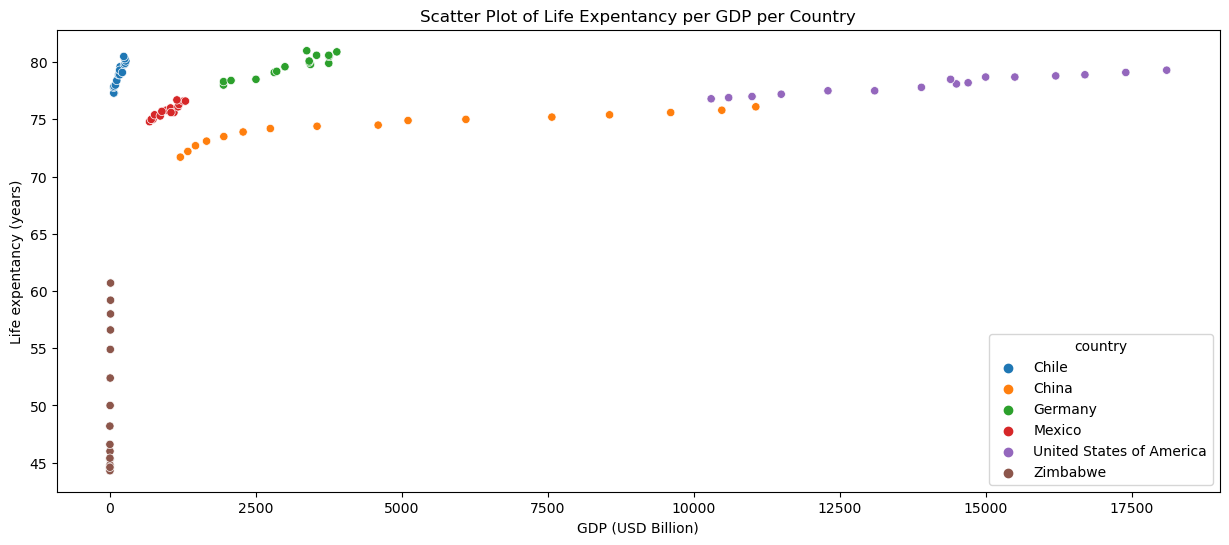

<Figure size 640x480 with 0 Axes>

In [34]:
# Create a custom figure
plt.figure(figsize=[15,6])


# Scatter plot
sns.scatterplot(x="gdp_billion", y="life_expectancy", data=data, hue="country")

# Add Title and Labels
plt.title("Scatter Plot of Life Expentancy per GDP per Country")
plt.xlabel("GDP (USD Billion)")
plt.ylabel("Life expentancy (years)")

# Show and close the plot
plt.show()
plt.clf()

- There is evidence on a visual level that there is a positive linear relationship between GDP and Life Expectancy. That is: while higher the GDP of a country, higher is the Life Expectancy of said country.
- Nonetheless, the relationship seems to be country specific in terms of strenght and even absent in Zimbabwe, whose Life Expentancy seems to change independently.
- There is also evidence of diminishing returns in the case of China, which means that as China's GDP continues to grow, the corresponding increase in Life Expectancy appears to level off. 
- This suggests that while economic growth has initially contributed to improvements in life expectancy, the impact may be reaching a saturation point. Understanding these nuances in the relationship between GDP and Life Expectancy is crucial for policymakers and researchers aiming to implement targeted strategies and interventions that consider the unique characteristics of each country.

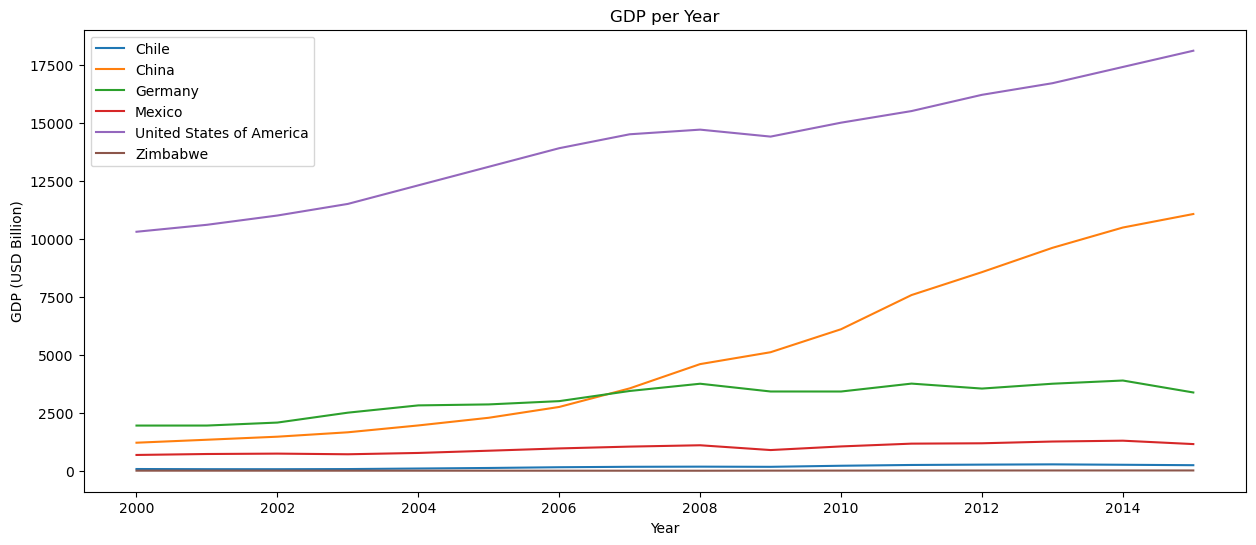

In [32]:
# Create a custom figure
plt.figure(figsize=[15,6])

# GDP per Year Lineplot
sns.lineplot(x="year", y="gdp_billion", hue="country", data=data)

# Add title, labels and legend
plt.title("GDP per Year")
plt.xlabel("Year")
plt.ylabel("GDP (USD Billion)")
plt.legend()

# Show the plot
plt.show()
plt.close()


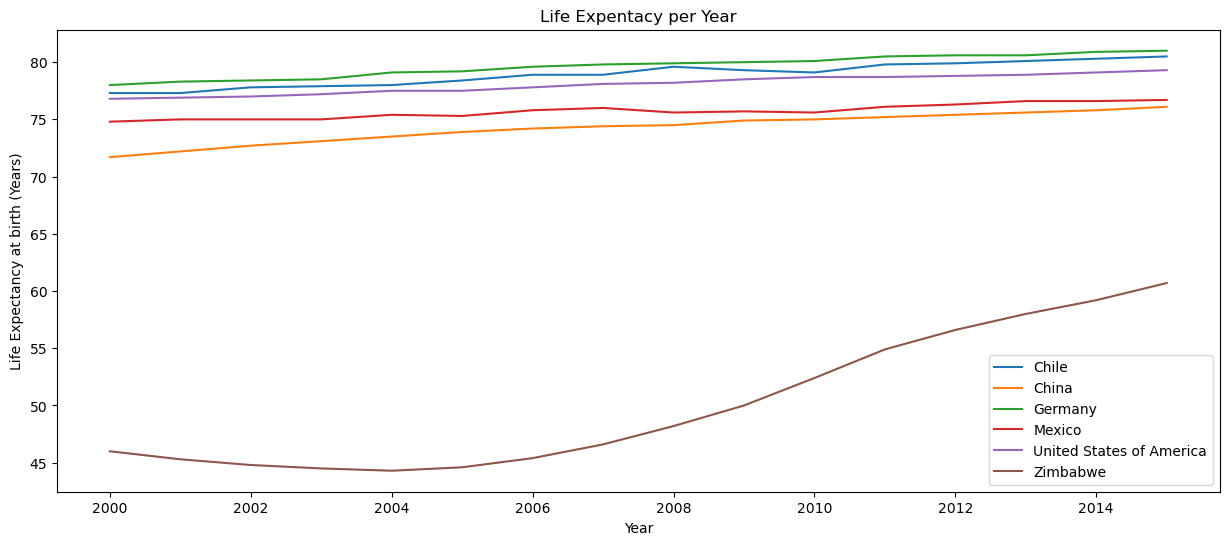

In [36]:
# Create a custom figure
plt.figure(figsize=[15,6])

# GDP per Year Lineplot
sns.lineplot(x="year", y="life_expectancy", hue="country", data=data)

# Add title, labels and legend
plt.title("Life Expentacy per Year")
plt.xlabel("Year")
plt.ylabel("Life Expectancy at birth (Years)")
plt.legend()

# Show the plot
plt.show()
plt.close()


## Regression Analysis
Analyze the data with a regression analysis and use dummies to factor in the country.

In [39]:

# Create dummy variables for each country
data_with_dummies = pd.get_dummies(data, columns=['country'], drop_first=True)

# Separate independent variable (X) and dependent variable (y)
X = data_with_dummies[['gdp_billion'] + [col for col in data_with_dummies.columns if col.startswith('country_')]]
y = data_with_dummies['life_expectancy']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression results
(model.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     270.2
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           7.17e-55
Time:                        17:53:46   Log-Likelihood:                -221.14
No. Observations:                  96   AIC:                             456.3
Df Residuals:                      89   BIC:                             474.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               78.8800      0.629    125.331      0.000      77.629      80.131
gdp_billion                          0.0004      0.000      2.498      0.014    7.68e-05       0.001
country_China                       -6.4791      1.144     -5.663      0.000      -8.752      -4.206
country_Germany                     -0.3858      0.992     -0.389      0.698      -2.357       1.585
country_Mexico                      -3.5280      0.898     -3.931      0.000      -5.311      -1.745
country_United States of America    -6.1027      2.271     -2.687      0.009     -10.616      -1.589
country_Zimbabwe                   -28.7896      0.890    -32.360      0.000     -30.557     -27.022
==============================================================================
Omnibus:                       42.887   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.472
Skew:                           1.335   Prob(JB):                     1.60e-42
Kurtosis:                       9.402   Cond. No.                     6.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary Statistics:
- **Dependent Variable (Dep. Variable):** `life_expectancy`
  - This is the variable you are trying to predict—the life expectancy of each observation.

- **Model:** OLS (Ordinary Least Squares)
  - Ordinary Least Squares is a method for estimating the parameters of a linear regression model.

- **R-squared:** 0.948
  - Represents the proportion of the variance in the dependent variable (life expectancy) explained by the independent variables (gdp_billion and country dummy variables). In this case, 94.8% of the variability in life expectancy is explained by the model.

### Coefficients Table:
- **Intercept (const):** 78.8800
  - The estimated constant term or the predicted value of life expectancy when all independent variables are zero.

- **gdp_billion:** 0.0004
  - The estimated coefficient for 'gdp_billion,' representing the change in life expectancy for a one-unit increase in 'gdp_billion,' while holding the country constant. The coefficient is positive, suggesting a positive relationship between GDP and life expectancy.

- **Country-Specific Coefficients:**
  - For each country, there is a coefficient representing the estimated difference in life expectancy compared to the reference country (the one omitted by `drop_first=True`). Notably, 'country_Zimbabwe' has a coefficient of -28.7896, indicating a substantial difference in life expectancy compared to the reference country.

- **Prob (P>|t|):**
  - Represents the p-value associated with each coefficient. Small p-values (typically < 0.05) suggest that the variable is significant in predicting the dependent variable. In this case, 'gdp_billion,' 'country_China,' 'country_Mexico,' 'country_United States of America,' and 'country_Zimbabwe' are statistically significant.

### Additional Statistics:
- **Observations (No. Observations):** 96
  - The number of data points used in the regression analysis.

- **Durbin-Watson:** 0.110
  - A test statistic for detecting autocorrelation in the residuals. Values close to 2 suggest no significant autocorrelation.

### Notes:
- **Standard Errors (Notes [1]):**
  - Assumption about the variability of the coefficient estimates.

- **Multicollinearity Warning (Notes [2]):**
  - Indicates potential multicollinearity problems or a singular design matrix. This may be a concern, and you might want to investigate further.

### Interpretation:
- The model suggests a strong relationship between 'gdp_billion' and life expectancy, as indicated by the positive coefficient for 'gdp_billion.'
- The R-squared value indicates a high goodness of fit, suggesting that the model explains a significant portion of the variance in life expectancy.
- Coefficients for each country highlight the estimated impact of each country on life expectancy compared to the reference country.
- 'country_Zimbabwe' has a substantial negative impact on life expectancy, suggesting a unique pattern compared to other countries.

### Next Steps:
- Interpret the coefficients in the context of your specific analysis and data.
- Check for statistical significance using p-values.
- Investigate potential multicollinearity issues based on the warning.
- Examine the residuals to ensure the model assumptions are met.

This analysis provides valuable insights into the relationship between GDP, country-specific effects, and life expectancy. Adjustments or further analyses may be necessary based on the specifics of your research question and dataset.

## Residual Analysis
**To validate the regression analysis one has to validate the following:**
- Normality of residuals
- Homocedasticity (constant variances)
- Independence of residuals
- Linearity

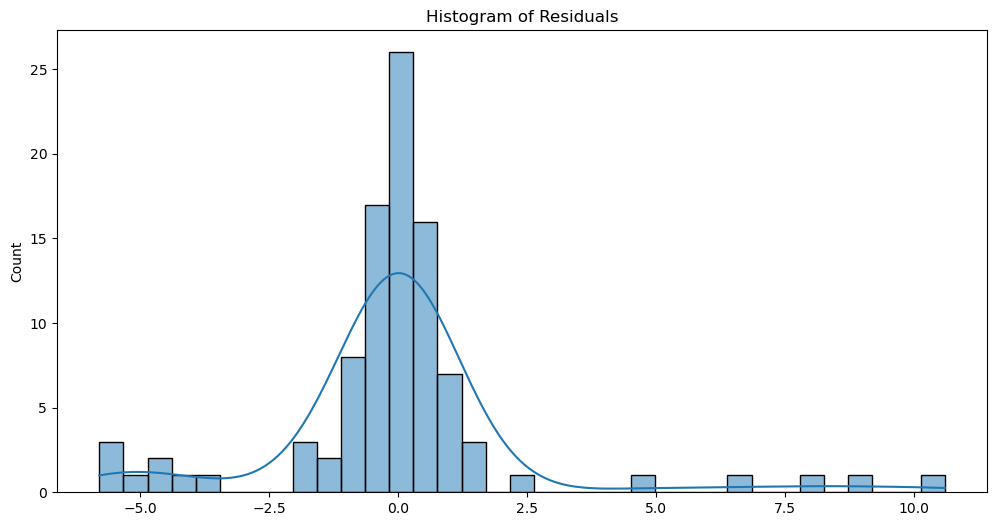

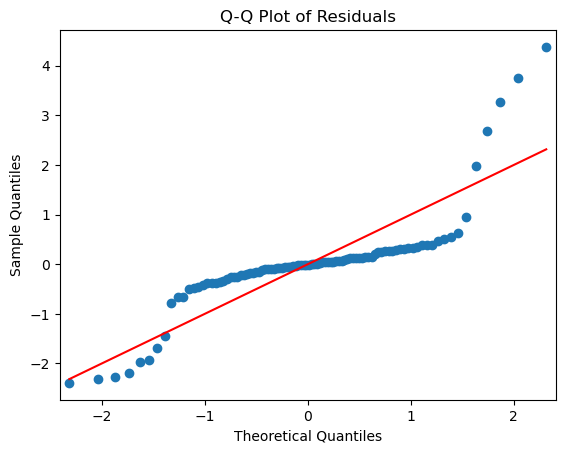

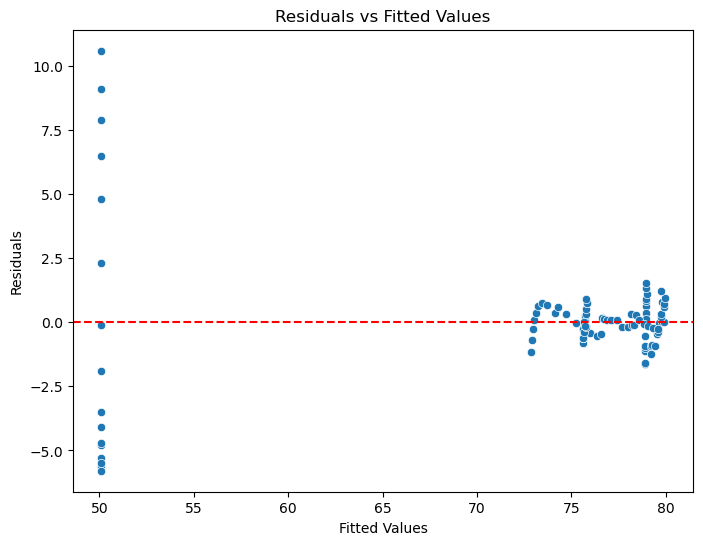

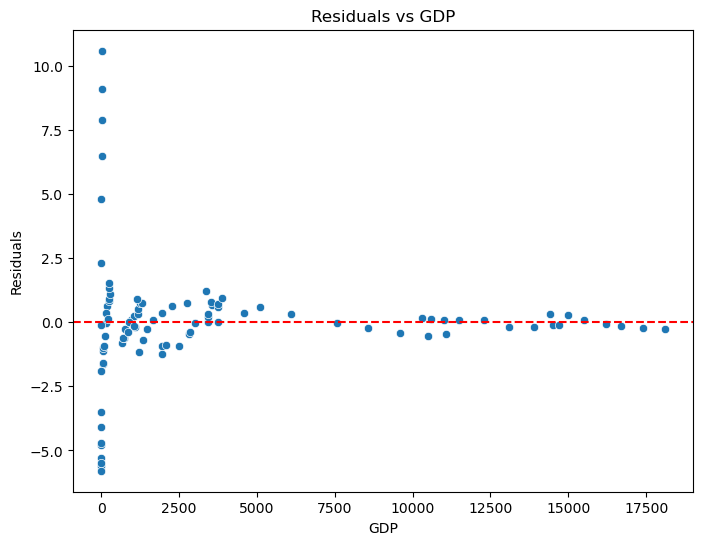

In [43]:
# Step 1: Obtain Residuals
residuals = model.resid

# Step 2: Check for Normality
plt.figure(figsize=(12, 6))

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q Plot of Residuals
sm.qqplot(residuals, line='s', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Step 3: Check for Homoscedasticity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Step 4: Check for Independence
# Plot residuals against relevant independent variables
# For example, if 'gdp_billion' is an important variable, use:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['gdp_billion'], y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs GDP')
plt.xlabel('GDP')
plt.ylabel('Residuals')
plt.show()



1. **Histogram of Residuals:**
   - **Purpose:** Checks the normality assumption of residuals.
   - **Interpretation:**
     - If the histogram resembles a bell-shaped curve, it suggests that the residuals are approximately normally distributed.
     - Skewness or heavy tails in the histogram may indicate departures from normality.

2. **Q-Q Plot of Residuals:**
   - **Purpose:** Assesses the normality assumption more rigorously.
   - **Interpretation:**
     - Points on the Q-Q plot should lie along a straight line if the residuals are normally distributed.
     - Deviations from the line indicate departures from normality.

3. **Residuals vs Fitted Values:**
   - **Purpose:** Checks for homoscedasticity (constant variance) of residuals.
   - **Interpretation:**
     - Ideally, the spread of residuals should be roughly constant across all levels of fitted values.
     - A pattern in the residuals (e.g., a cone shape) suggests heteroscedasticity.

4. **Residuals vs Independent Variable (e.g., GDP):**
   - **Purpose:** Checks for independence and potential patterns in residuals related to specific predictor variables.
   - **Interpretation:**
     - If there's no clear pattern and residuals are randomly scattered, it suggests independence.
     - If a pattern is observed, it may indicate a problem (e.g., omitted variable bias).

Here are some additional tips:

- **Normality:** For normality assessment, look for a symmetric bell-shaped distribution in the histogram and a straight line in the Q-Q plot. If there are deviations, consider transformations or robust regression methods.

- **Homoscedasticity:** In the residuals vs fitted values plot, check for a consistent spread of residuals across different levels of fitted values. Heteroscedasticity may lead to inefficient estimates and affect statistical tests.

- **Independence:** In the residuals vs independent variable plot, look for random scattering of residuals. If a pattern emerges, it may suggest that the model does not capture some relevant information.

- **Outliers:** Identify any unusually large residuals in these plots, as they may indicate outliers or influential observations.

In summary, these plots are diagnostic tools to assess the assumptions of the regression model. Understanding and interpreting these plots help ensure the reliability and validity of the model's results.

### Plot analysis
1. Histogram of Residuals:
- Despite the fact that there is a bell shaped curve, there are clearly heavy tails and a is perhaps even right skewed.
- Conclussion: Not a normal distribution.

2. Q-Q Plot of Residuals:
- There is a clear deviation from the straight line, specially towards both ends.
- Conclussion: Not a normal distribution.

3. Residual vs. Fitted Values:
- The spreads is not constant across all levels of fitted values.
- There is a clear pattern on both ends.
- Conclussion: Heterocedasticity.

4. Residuals vs. Independent Variable:
- There is a clear pattern in the plot.
- Conclussion: No variable independence.

### Summary:
**The plot does not conform to any of the following assumptions:**
- Normality.
- Homocedasticity.
- Independence.

## Refining the Model

In order to refine the model, let's filter all of the data regarding Zimbabwe, as it is an outlier that shows little to no contribution to the regression analysis between life expectancy and GDP.

### Creating a new Data Frame without Zimbabwe's Data

In [44]:
# Create a new Data Frame filtering out Zimbabwe
data_no_zimbabwe = data[data['country'] != 'Zimbabwe']

### Regression Analysis

In [46]:

# Create dummy variables for each country
data_with_dummies = pd.get_dummies(data_no_zimbabwe, columns=['country'], drop_first=True)

# Separate independent variable (X) and dependent variable (y)
X = data_with_dummies[['gdp_billion'] + [col for col in data_with_dummies.columns if col.startswith('country_')]]
y = data_with_dummies['life_expectancy']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression results
(model.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     159.8
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           3.49e-38
Time:                        18:59:31   Log-Likelihood:                -79.412
No. Observations:                  80   AIC:                             170.8
Df Residuals:                      74   BIC:                             185.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               78.8802      0.170    464.381      0.000      78.542      79.219
gdp_billion                          0.0004   4.06e-05      9.224      0.000       0.000       0.000
country_China                       -6.4728      0.309    -20.964      0.000      -7.088      -5.858
country_Germany                     -0.3820      0.268     -1.427      0.158      -0.915       0.152
country_Mexico                      -3.5269      0.242    -14.559      0.000      -4.010      -3.044
country_United States of America    -6.0843      0.613     -9.925      0.000      -7.306      -4.863
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   0.521
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.384
Skew:                          -0.160   Prob(JB):                        0.825
Kurtosis:                       2.886   Cond. No.                     6.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Results Interpretation
The regression analysis results without Zimbabwe show a model with an adjusted R-squared of approximately 0.909, indicating that the model accounts for a substantial proportion of the variance in the dependent variable. Here's a brief interpretation of the key results:

1. **Coefficients:**
   - The coefficient for the constant term (intercept) is approximately 78.8802. This represents the estimated life expectancy when all predictor variables are zero.
   - The coefficient for 'gdp_billion' is approximately 0.0004, indicating the estimated change in life expectancy for a one-unit increase in GDP (in billion units).
   - The coefficients for 'country_China,' 'country_Germany,' 'country_Mexico,' and 'country_United States of America' represent the estimated differences in life expectancy compared to the reference country (assuming zero for Zimbabwe).

2. **Significance of Coefficients:**
   - All coefficients, except for 'country_Germany,' are statistically significant (p < 0.05), suggesting that they are likely different from zero.
   - 'country_Germany' has a p-value of 0.158, indicating that its effect on life expectancy may not be statistically significant at the conventional significance level of 0.05.

3. **Diagnostic Tests:**
   - The Omnibus test, Durbin-Watson statistic, and Jarque-Bera test are diagnostic tests. The Omnibus test tests for normality of residuals, and a high p-value (0.817) suggests that the residuals may be normally distributed.
   - The Durbin-Watson statistic (0.521) is low, indicating potential autocorrelation in residuals.
   - The Jarque-Bera test (p-value 0.825) suggests that residuals may follow a normal distribution.

4. **Multicollinearity Warning:**
   - The note mentions that the condition number is large (6.44e+04), indicating potential multicollinearity or other numerical problems. It's important to investigate multicollinearity among predictor variables.

5. **Observations:**
   - The model fit is good, but the issues identified in diagnostic tests (autocorrelation and potential multicollinearity) should be further examined and addressed.
   - The effect of excluding Zimbabwe should be considered in the context of the research question and the specific behavior of Zimbabwe's data.

Remember to carefully assess the assumptions, diagnostic tests, and practical significance of the coefficients in the context of your research question. Consider addressing any issues identified in the diagnostic tests and interpreting coefficients in relation to the reference category (Zimbabwe).

### Autocorrelation in Residuals
Autocorrelation in residuals, also known as serial correlation, refers to the correlation between the error terms of a regression model across different observations or time points. In a time series context, it implies that the residuals at one time point are correlated with the residuals at nearby time points. Autocorrelation violates the assumption of independence of residuals, which is a critical assumption in linear regression.

Here are key points to understand about autocorrelation in residuals:

1. **Definition:**
   - Autocorrelation occurs when the residuals of a regression model exhibit a pattern of correlation or dependence over time or across observations.

2. **Assumption of Independence:**
   - One of the fundamental assumptions of linear regression is that the residuals (errors) are independent of each other. Independence means that the error term for one observation does not provide information about the error term for another observation.

3. **Consequences of Autocorrelation:**
   - Autocorrelation can lead to inefficient parameter estimates, unreliable standard errors, and biased hypothesis tests.
   - If autocorrelation is present, the estimated standard errors may be too small, leading to underestimated p-values and inflated confidence intervals.

4. **Time Series Data:**
   - Autocorrelation is often a concern in time series data, where observations are ordered chronologically.
   - In time series regression, autocorrelation can arise if there are patterns or trends in the residuals that persist over time.

5. **Diagnosis and Detection:**
   - Autocorrelation can be diagnosed by examining the residuals' plot over time or using statistical tests such as the Durbin-Watson statistic or the Ljung-Box test.
   - A plot of residuals against time or lagged residuals can reveal patterns indicative of autocorrelation.

6. **Correction:**
   - Methods to address autocorrelation include including lagged values of the dependent variable or using autoregressive integrated moving average (ARIMA) models.
   - Another approach is to use robust standard errors or heteroscedasticity-robust standard errors in regression analysis.

7. **Durbin-Watson Statistic:**
   - The Durbin-Watson statistic is a test for autocorrelation in the residuals. It ranges from 0 to 4, with values close to 2 indicating no significant autocorrelation.

Addressing autocorrelation is crucial for obtaining reliable and valid results from regression analysis, especially when dealing with time series data. Ignoring autocorrelation can lead to biased parameter estimates and inaccurate inferences about the relationships between variables.

## Data Visualization

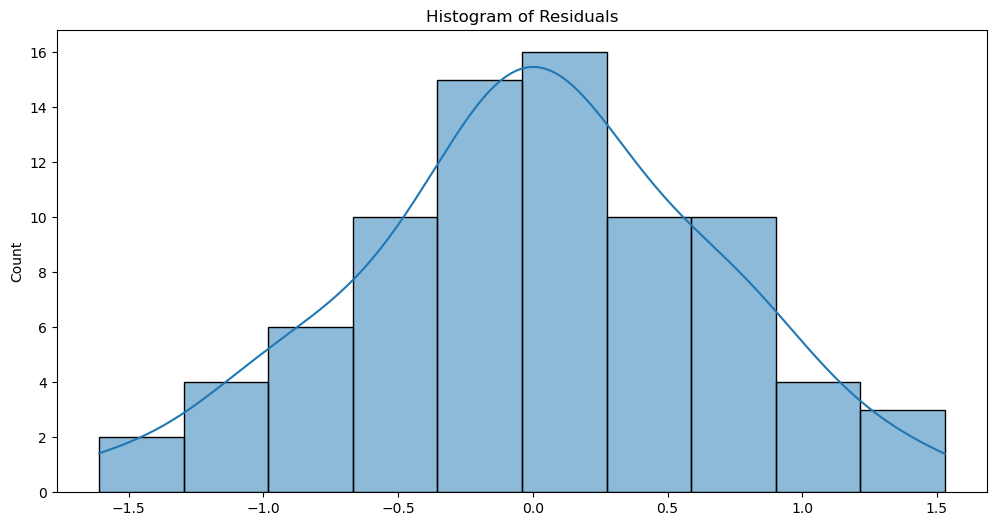

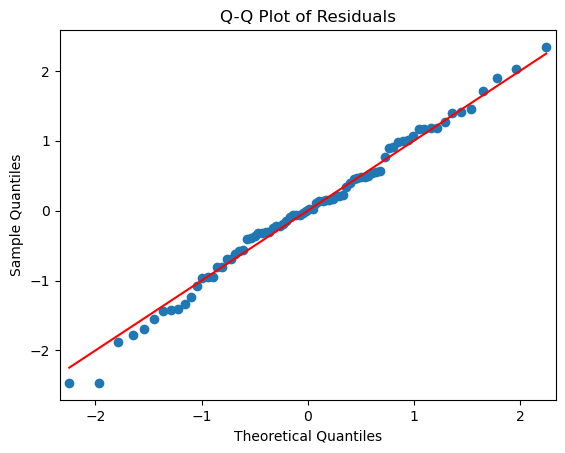

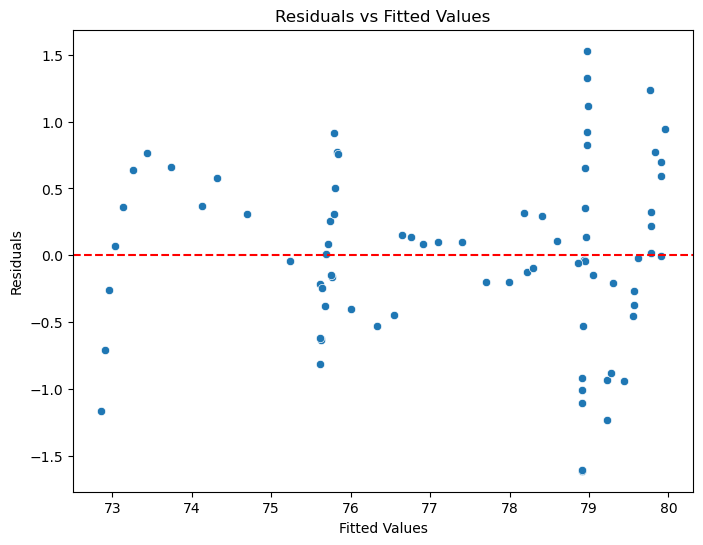

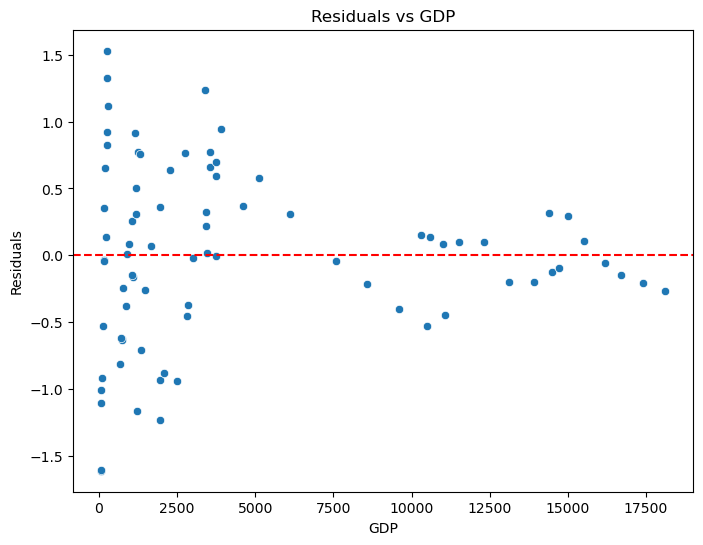

In [47]:
# Step 1: Obtain Residuals
residuals = model.resid

# Step 2: Check for Normality
plt.figure(figsize=(12, 6))

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q Plot of Residuals
sm.qqplot(residuals, line='s', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Step 3: Check for Homoscedasticity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Step 4: Check for Independence
# Plot residuals against relevant independent variables
# For example, if 'gdp_billion' is an important variable, use:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['gdp_billion'], y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs GDP')
plt.xlabel('GDP')
plt.ylabel('Residuals')
plt.show()


### Plot Analysis of Residuals
1. Histogram of Residuals:
- There is evidence of a normal distribution with no skewness or hight tails.
- Conclussion: Normal distribution.

2. Q-Q Plot of Residuals:
- Residuals follow roughly the straight line.
- Conclussion: Normal distribution.

3. Residual vs. Fitted Values:
- The spreads is not constant across all levels of fitted values.
- There is a clear pattern on both ends.
- Conclussion: Heterocedasticity.

4. Residuals vs. Independent Variable:
- There is a clear pattern in the plot.
- Conclussion: No variable independence.

### Summary:
**The models conform to the following assumption:**
- Normality.
**The plot does not conform to any of the following assumptions:**
- Homocedasticity.
- Independence.

### Observation
In time series data, the assumption of independence of residuals is often violated because observations at different time points may be correlated due to the temporal ordering of the data. This violation is known as autocorrelation, and it is a common characteristic of time series data. Autocorrelation in residuals can arise due to unmodeled temporal patterns or trends in the data.

Here are some considerations for dealing with autocorrelation in time series analysis:

1. **Model Residual Autocorrelation:**
   - Examine the residual plot over time or lagged residuals to visualize any patterns indicative of autocorrelation.
   - Apply statistical tests such as the Durbin-Watson statistic, Ljung-Box test, or Breusch-Godfrey test to formally test for autocorrelation.

2. **Autoregressive Integrated Moving Average (ARIMA) Models:**
   - ARIMA models are specifically designed to handle autocorrelation in time series data.
   - The autoregressive (AR) component captures the autocorrelation in the series, and the moving average (MA) component accounts for unmodeled patterns.
   - Integrated (I) component represents differencing to achieve stationarity.

3. **Differencing:**
   - Differencing the time series data (subtracting each observation from its lagged value) is a common technique to remove autocorrelation.
   - Seasonal differencing can be applied if there are periodic patterns.

4. **Include Lagged Values:**
   - Including lagged values of the dependent variable or relevant predictors in the model can help capture autocorrelation.

5. **Time Series Cross-Validation:**
   - Use time series cross-validation techniques to assess the model's predictive performance on out-of-sample data.

6. **Residual Diagnostics:**
   - Conduct thorough residual diagnostics to identify and address any remaining patterns in the residuals.
   - If autocorrelation persists, consider more advanced models or modifications to the existing model.

7. **Advanced Models:**
   - For complex time series data, consider advanced models like Seasonal-Trend decomposition using LOESS (STL), Long Short-Term Memory (LSTM) networks, or other machine learning approaches.

8. **Robust Standard Errors:**
   - In linear regression models, robust standard errors can be used to account for heteroscedasticity and autocorrelation.

9. **Transformations:**
   - Transformations like log transformations or Box-Cox transformations might help stabilize variance and improve model performance.

It's important to note that while independence of residuals is a key assumption in traditional regression, time series analysis often requires a different set of tools and considerations due to the temporal nature of the data. The goal is to build models that adequately capture the temporal dependencies and patterns present in the time series while addressing any violations of assumptions.